## Bike Sharing Assignment

'day.csv' file contains detail requried for the Assignment

Problem Statement : <br> 
A US bike-sharing provider BoomBikes wants to understand the demand for shared bikes among the people. They want to prepare themselves to cater to the people's needs once the situation gets better and stand out from other service providers and make huge profits. <br>
In this assignment we will help them know which variables are significant in predicting the demand for shared bike and how well those variables describe the bike demands.
This would be done by modelling the demand for shared bikes with the available independent variables. This model will be a good way for management to understand the demand dynamics of a new market post Corona pandemic.

In [100]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Analysing the data

In [2]:
#load csv file
bike_data = pd.read_csv('day.csv')

In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Data Understanding, Preparation & EDA

In [6]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_data.shape

(730, 16)

### Data Clean Up

###### Understanding
There are no null or missing values. We see there are total 16 columns some of them conveying same information like <i> holiday and workingday </i> or <i> causual+registered and cnt. </i> Column <i> dteday </i> is not needed as the similar information is conveyed by <i> yr and mnth. </i> Column <i> instant </i> can also be dropped as its just a index number.

In [8]:
# before dropping columns lets check the corr matrix
bike_data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


#### Dropping the columns which have redundant data

In [9]:
# though holiday is 25% negatively correlated related to working day but because of business knowledge we know they are related and also there effect on target variable is almost same just one is positive and other is negative, hence we can drop holiday.
# adding all the columns to be deleted to a list
to_be_deleted_list = ['instant','dteday','holiday','casual','registered']

In [10]:
# drop the irrelevant columns
bike_data = bike_data.drop(to_be_deleted_list,axis=1, errors='ignore')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [11]:
bike_data.head(4)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562


In [12]:
# lets look at the number of unique values in the data
bike_data.nunique()

season          4
yr              2
mnth           12
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Univariate Analysis
###### Lets check continuous variables for outliers 

<Axes: >

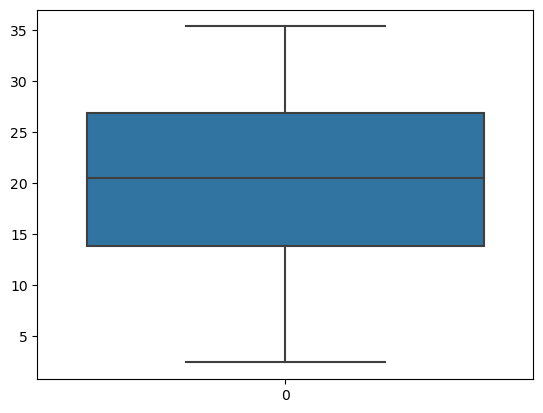

In [13]:
# for temp
sns.boxplot(bike_data.temp)

<Axes: >

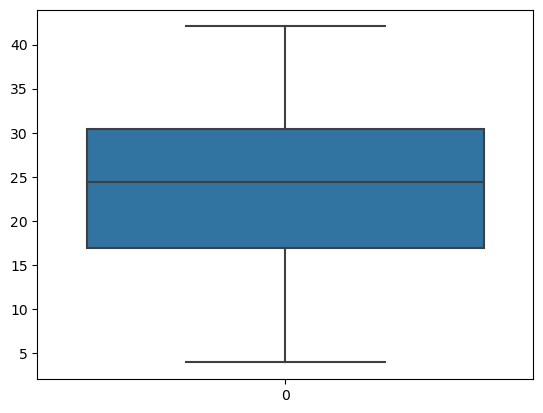

In [14]:
# for atemp
sns.boxplot(bike_data.atemp)

<Axes: >

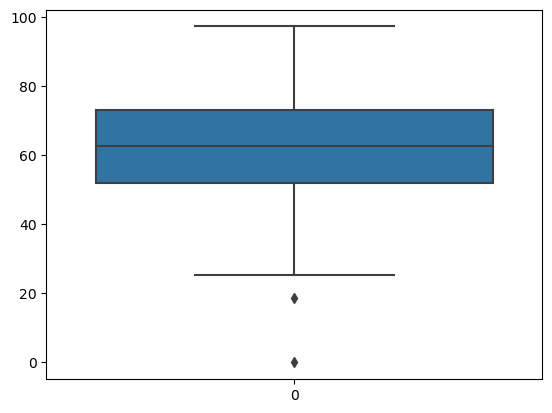

In [15]:
# for hum
sns.boxplot(bike_data.hum)

In [16]:
# Lets look at the data with outlier values for hum
bike_data[bike_data.hum<22]

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,1,0,2,6,0,1,16.365847,19.5702,18.7917,34.000021,1635
68,1,0,3,4,1,3,15.952731,19.2834,0.0000,17.545759,623


In [17]:
bike_data.shape

(730, 11)

In [18]:
# looks like this 0% humidity is recorded because of some instrument error. As having 0% humidity on a light rainy day is not possible, hence lets delete this instance.
bike_data = bike_data[~(bike_data.hum==0)]

In [19]:
bike_data.shape

(729, 11)

<Axes: >

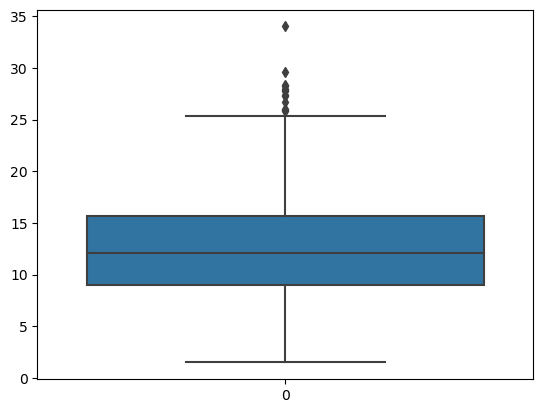

In [20]:
# for windspeed
sns.boxplot(bike_data.windspeed)

In [21]:
# Lets look at the data with outlier values for windspeed
bike_data[bike_data.windspeed>25]

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
44,1,0,2,1,1,1,17.015000,19.91750,37.5833,27.999836,1913
49,1,0,2,6,0,1,16.365847,19.57020,18.7917,34.000021,1635
93,2,0,4,1,1,1,23.506653,27.14645,42.6250,25.833257,3115
94,2,0,4,2,1,2,16.980847,19.91750,64.2083,26.000489,1795
238,3,0,8,6,0,2,27.880000,31.77780,85.0000,25.166339,1115
292,4,0,10,4,1,1,19.509153,23.32625,63.6250,28.292425,4195
377,1,1,1,5,1,1,11.240847,12.46810,50.7500,25.333236,3214
382,1,1,1,3,1,1,12.436653,13.76270,44.3333,27.833743,3376
407,1,1,2,0,0,1,5.227500,5.08290,46.4583,27.417204,1529
420,1,1,2,6,0,1,11.924153,12.78375,39.5833,28.250014,2732


#### Observation
Here we see there are no outliers to be handled in case of temp and atemp. Very few outliers we see for hum and windspeed. While analysing except one case for humidity rest all looks okay. Hence we leave the rest outliers as it is.

### Lets look at categorical variables and do necessary processing if needed to make them understandable.

##### Lets look at column season

In [22]:
bike_data.season.value_counts()

3    188
2    184
1    179
4    178
Name: season, dtype: int64

In [23]:
# lets rename the values for each season so they make more sense when interpreting the model.
# We know from data dictionary that : season (1:spring, 2:summer, 3:fall, 4:winter)
bike_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

In [24]:
bike_data.season.value_counts()

fall      188
summer    184
spring    179
winter    178
Name: season, dtype: int64

##### Lets look at column yr

In [25]:
bike_data.yr.value_counts()

1    365
0    364
Name: yr, dtype: int64

In [26]:
# Here lets rename the column itself to avoid confusion as we have just two values 0 and 1.
# From data dictionary we know 1 means 2019
bike_data.rename(columns={'yr':'yr_2019'}, inplace=True)

In [27]:
bike_data.head(2)

,season,yr_2019,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801


##### Lets look at column mnth

In [28]:
bike_data.mnth.value_counts()

1     62
5     62
7     62
8     62
10    62
12    62
3     61
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [29]:
bike_data.mnth = bike_data.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})

In [30]:
bike_data.mnth.value_counts()

Jan    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Mar    61
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

##### Lets look at column weekday

In [31]:
bike_data.weekday.value_counts()

6    105
0    105
1    105
2    104
5    104
3    103
4    103
Name: weekday, dtype: int64

In [32]:
bike_data.weekday = bike_data.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})

In [33]:
bike_data.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Fri    104
Wed    103
Thu    103
Name: weekday, dtype: int64

##### Lets look at column workingday

In [34]:
bike_data.workingday.value_counts()

1    498
0    231
Name: workingday, dtype: int64

###### 1> Here we need not do anything as we have just two values 0 and 1. <br> 2> From data dictionary we know 1 means its a working day.

##### Lets look at column weathersit

In [35]:
bike_data.weathersit.value_counts()

1    463
2    246
3     20
Name: weathersit, dtype: int64

lets rename the values for each category so they make more sense when interpreting the model.
We know from data dictionary that : 
    weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Observation
We also can also observe that we don't have any data for the 4 category. Seems the place from where the data was collected didn't had severe weather conditions for full two years.

In [36]:
bike_data.weathersit.replace({1:'good',2:'moderate',3:'bad'},inplace = True)

In [37]:
bike_data.weathersit.value_counts()

good        463
moderate    246
bad          20
Name: weathersit, dtype: int64

In [38]:
bike_data.head()

,season,yr_2019,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,Sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing the data

<Axes: >

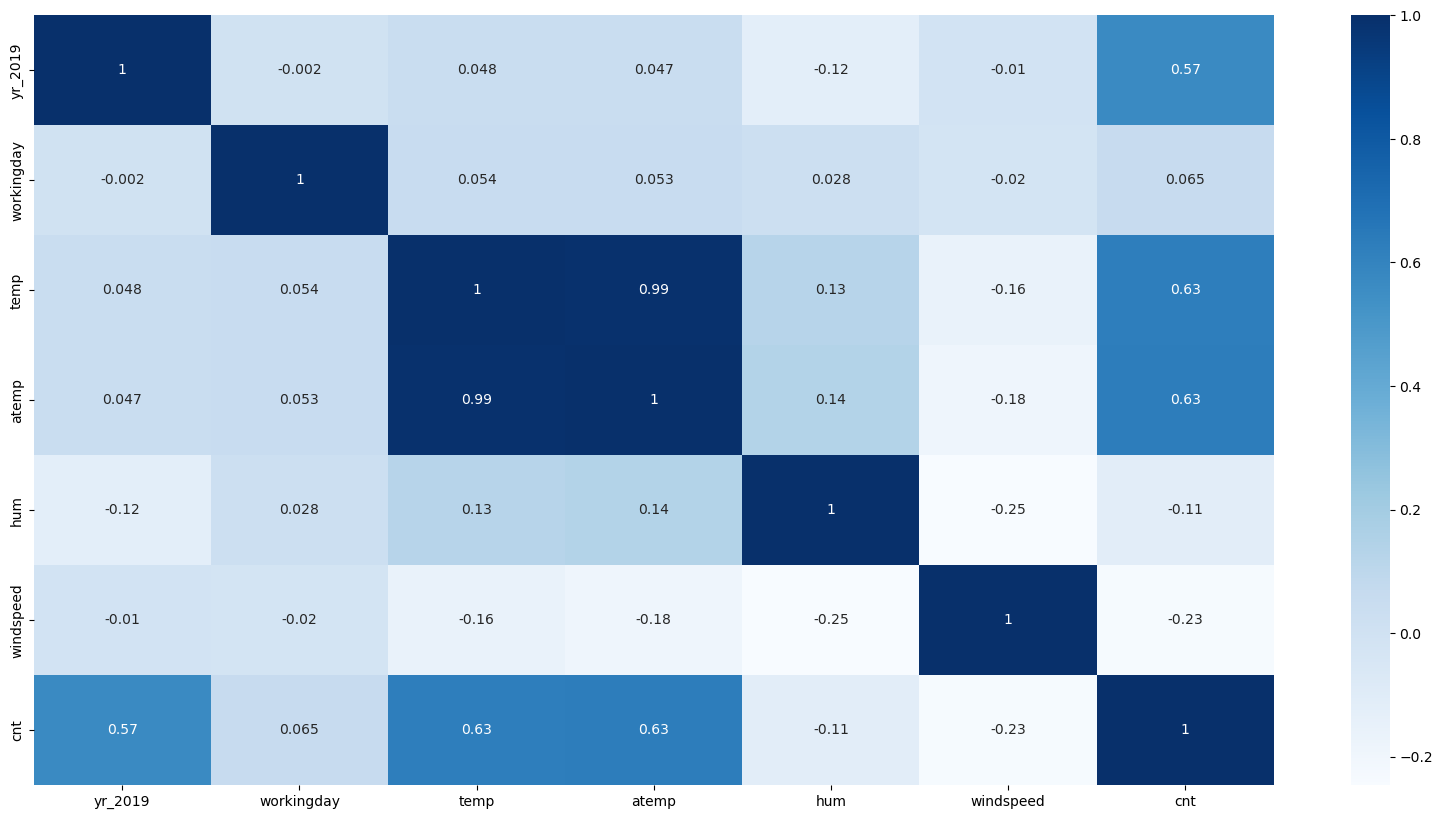

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(bike_data.corr(), annot = True, cmap='Blues')

#### Observation
Since temp and atemp are highly correlated (99%) And both have same correlation with the target variable.<br>
atemp also seems to be related to humidity.<br>
So lets drop temp column.<br>
We also observe that this has the highest correlation with the target variable (63%).

In [40]:
# lets drop temp column
bike_data = bike_data.drop(['temp'],axis=1, errors='ignore')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      729 non-null    object 
 1   yr_2019     729 non-null    int64  
 2   mnth        729 non-null    object 
 3   weekday     729 non-null    object 
 4   workingday  729 non-null    int64  
 5   weathersit  729 non-null    object 
 6   atemp       729 non-null    float64
 7   hum         729 non-null    float64
 8   windspeed   729 non-null    float64
 9   cnt         729 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.8+ KB


### Lets draw pairplot to visualize relationship between the variables

<Figure size 2000x1000 with 0 Axes>

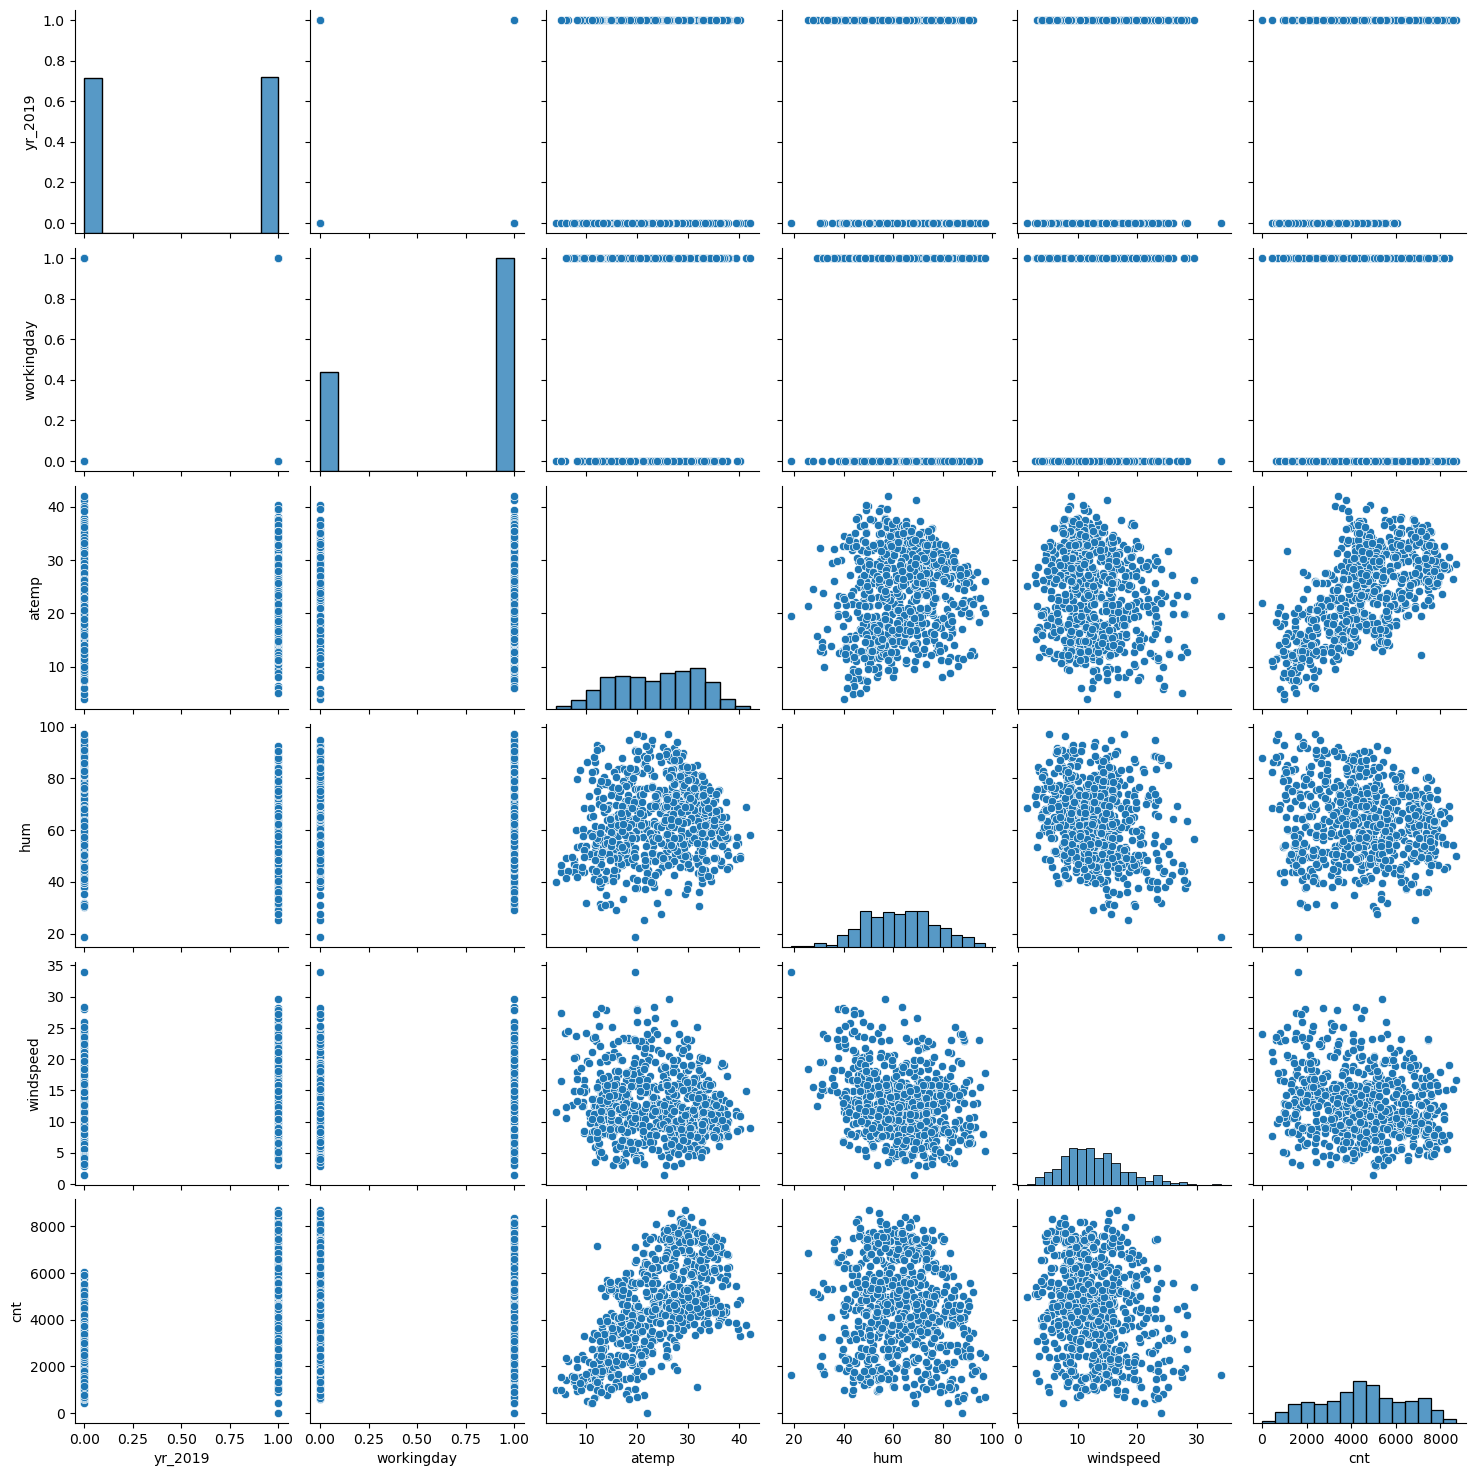

In [41]:
plt.figure(figsize=(20,10))
sns.pairplot(bike_data)

### Observation
We see atemp and hum has a linear relationship with cnt. Hence using a linear regression model would be a good approach.

### Segmented UniVariate Analysis

<Axes: xlabel='season', ylabel='cnt'>

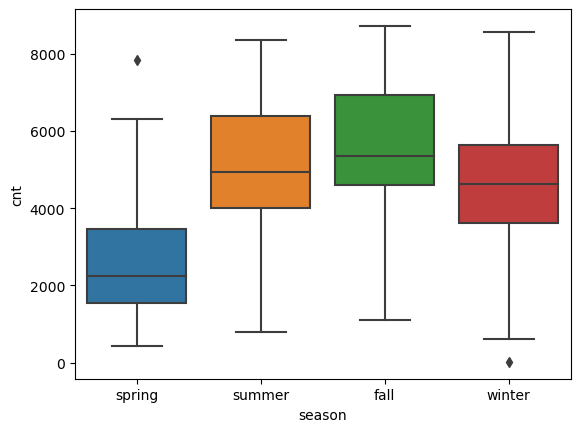

In [42]:
# cnt vs season
sns.boxplot(x='season', y='cnt', data=bike_data)

<Axes: xlabel='yr_2019', ylabel='cnt'>

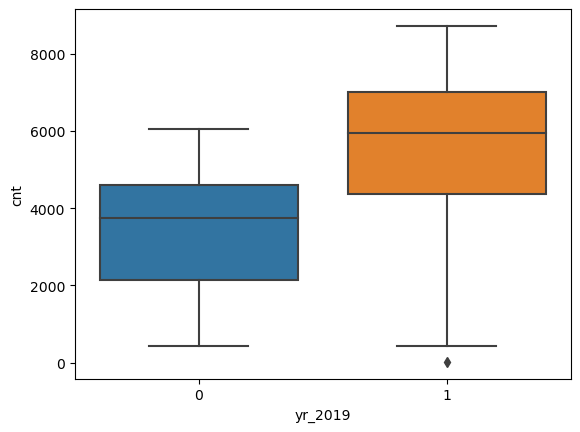

In [43]:
# cnt vs yr_2019
sns.boxplot(x='yr_2019', y='cnt', data=bike_data)

<Axes: xlabel='mnth', ylabel='cnt'>

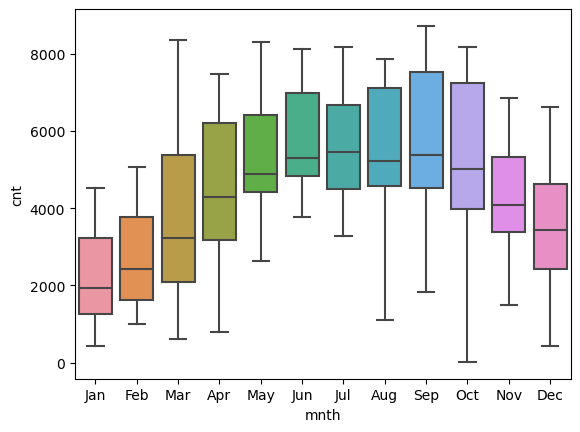

In [44]:
# cnt vs mnth
sns.boxplot(x='mnth', y='cnt', data=bike_data)

<Axes: xlabel='weekday', ylabel='cnt'>

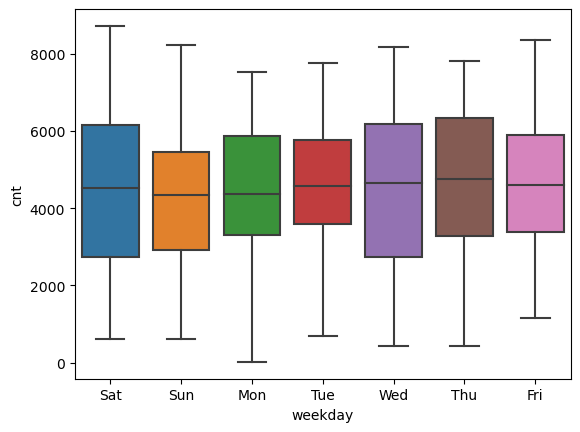

In [45]:
# cnt vs weekday
sns.boxplot(x='weekday', y='cnt', data=bike_data)

<Axes: xlabel='workingday', ylabel='cnt'>

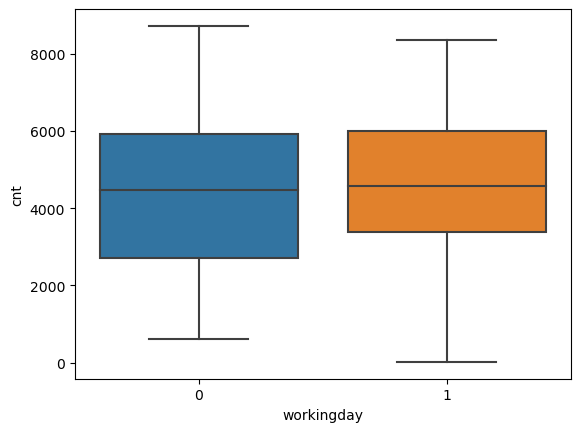

In [46]:
# cnt vs workingday
sns.boxplot(x='workingday', y='cnt', data=bike_data)

<Axes: xlabel='weathersit', ylabel='cnt'>

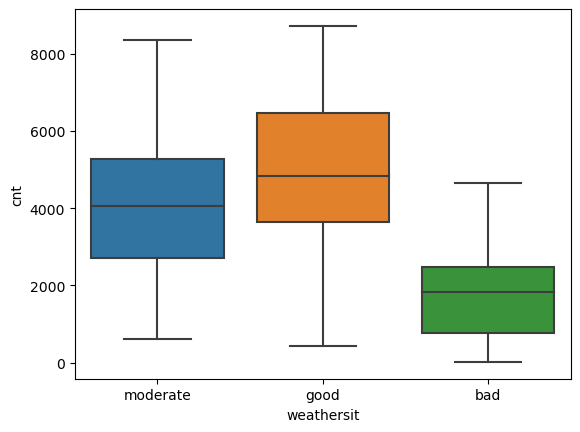

In [47]:
# cnt vs weathersit
sns.boxplot(x='weathersit', y='cnt', data=bike_data)

## Observations
1> We see the demand is highest in fall and least in spring.<br>
2> We see a significant increase in demand from year 2018 to 2019, this suggest that this business has the potential to grow overtime.<br>
3> We see a increase in the median for demand from jan to jun then its kinda constant for jul, aug, sep and then it declines.<br>
4> We also observe the demand is highest in month sept.<br>
5> We observe on sunday the demand is little less compared to other days but its not clear.<br>
6> Nothing substantial can be inferred from working day.<br>
7> We see when the weather is good there is increase in the demand. But its significantly low when the weather is bad.

### BiVariate Analysis

<Axes: xlabel='atemp', ylabel='cnt'>

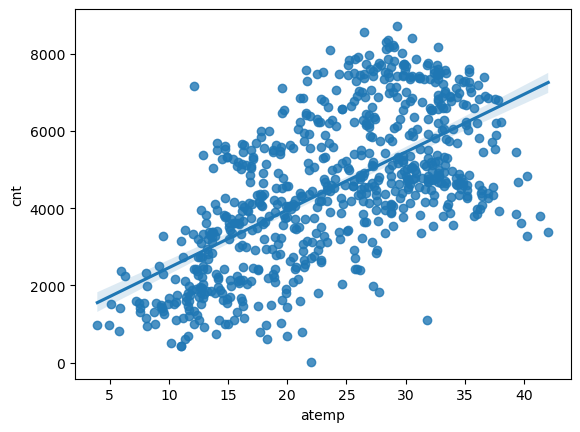

In [48]:
# cnt vs atemp
sns.regplot(data=bike_data,y="cnt",x="atemp")

<Axes: xlabel='hum', ylabel='cnt'>

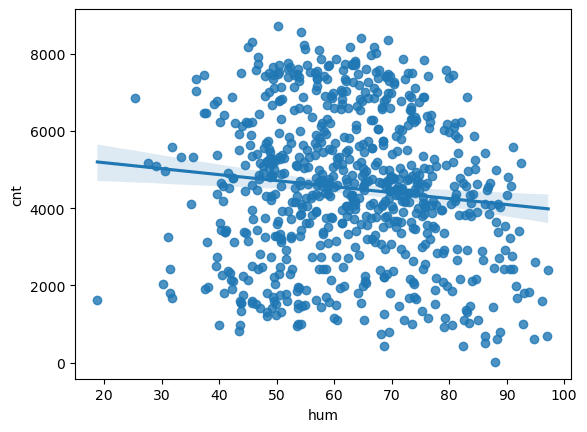

In [49]:
# cnt vs hum
sns.regplot(data=bike_data,y="cnt",x="hum")

<Axes: xlabel='windspeed', ylabel='cnt'>

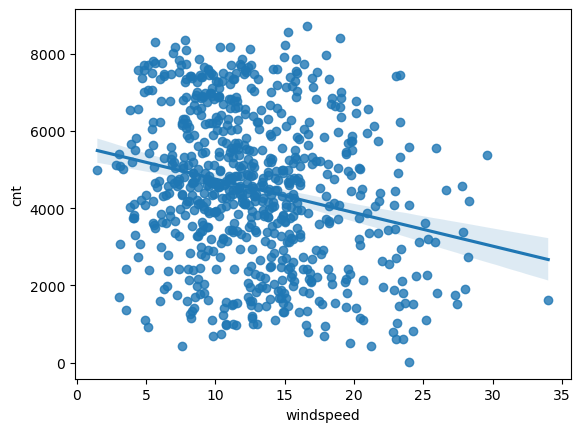

In [50]:
# cnt vs windspeed
sns.regplot(data=bike_data,y="cnt",x="windspeed")

<Axes: xlabel='hum', ylabel='atemp'>

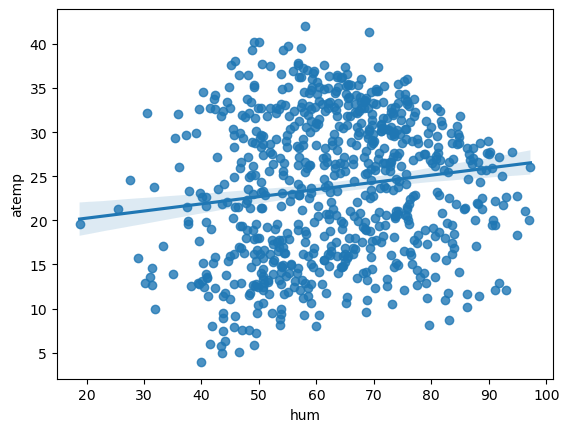

In [51]:
# atemp vs hum
sns.regplot(data=bike_data,y="atemp",x="hum")

## Observation
1> We see atemp is positively correlated with cnt. We can also observe it shows a linear relationship with cnt with a good confidence interval.<br>
2> We also observe that hum and windspeed though quite scattered show a slightly negative correlation with cnt.<br>
3> We also see that atemp increases with increase in humidity. Which is natural too.

In [52]:
bike_data.value_counts()

season  yr_2019  mnth  weekday  workingday  weathersit  atemp     hum      windspeed  cnt 
fall    0        Aug   Fri      1           good        32.70210  41.5000  8.416607   4905    1
summer  1        Apr   Thu      1           good        24.65230  61.2500  4.417256   6565    1
                       Tue      1           good        20.26415  45.4167  16.708661  5633    1
                                                        21.81165  43.5000  16.708125  5918    1
                                                        23.07415  39.6667  6.708911   6772    1
                                                                                             ..
spring  0        Jan   Sun      0           moderate    17.68695  69.6087  16.652113  801     1
                       Thu      1           good        7.54415   47.0417  20.167000  1406    1
                                                        10.98500  68.7500  7.627079   431     1
                                             

## Prepare data for Modelling
- Encoding
    - converting binary variables to 1/0, This is already done. <br>
    - other categorical variables to dummy variables, We need to work on this.

In [53]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
 

In [55]:
# Get dummy variables for season, mnth, weekday and weathersit; for weathersit we won't drop the last column as it had 4 categories in data dictionary.
bike_data = pd.get_dummies(data=bike_data,columns=['season','mnth','weekday'],drop_first=True)

In [56]:
# Reason for doing this is because earlier when had build model without considering it the weathersit_good and weathersit_moderate variables were having high VIF (around 14 and 12) and at the end was removed, this lead to realization that maybe we were losing data in this step.
bike_data = pd.get_dummies(data=bike_data,columns=['weathersit'])

In [57]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr_2019              729 non-null    int64  
 1   workingday           729 non-null    int64  
 2   atemp                729 non-null    float64
 3   hum                  729 non-null    float64
 4   windspeed            729 non-null    float64
 5   cnt                  729 non-null    int64  
 6   season_spring        729 non-null    uint8  
 7   season_summer        729 non-null    uint8  
 8   season_winter        729 non-null    uint8  
 9   mnth_Aug             729 non-null    uint8  
 10  mnth_Dec             729 non-null    uint8  
 11  mnth_Feb             729 non-null    uint8  
 12  mnth_Jan             729 non-null    uint8  
 13  mnth_Jul             729 non-null    uint8  
 14  mnth_Jun             729 non-null    uint8  
 15  mnth_Mar             729 non-null    uin

In [58]:
bike_data.head(2)

,yr_2019,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [59]:
bike_data.shape

(729, 29)

## Model Building

### Spliting into train and test

In [60]:
df_train, df_test = train_test_split(bike_data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Scale the numerical variables

In [61]:
# Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
nv = ['atemp','hum','windspeed','cnt']

# fit and transform only training set
df_train[nv] = scaler.fit_transform(df_train[nv])

In [62]:
df_train.head()

,yr_2019,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_bad,weathersit_good,weathersit_moderate
626,1,1,0.635584,0.450242,0.371638,0.864421,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
364,0,0,0.461603,0.552447,0.382342,0.247978,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
426,1,0,0.460736,0.559440,0.255342,0.438851,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0.210280,0.381387,0.663106,0.164795,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0.411155,0.389456,0.188475,0.457443,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [63]:
df_train.describe()

,yr_2019,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.674510,0.541209,0.571669,0.318011,0.496352,0.243137,0.243137,0.247059,0.090196,...,0.088235,0.137255,0.139216,0.158824,0.149020,0.135294,0.141176,0.021569,0.629412,0.349020
std,0.500352,0.469018,0.221255,0.182541,0.170567,0.235715,0.429398,0.429398,0.431725,0.286744,...,0.283915,0.344454,0.346511,0.365870,0.356457,0.342373,0.348545,0.145413,0.483437,0.477128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.357237,0.431818,0.192829,0.333213,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.552927,0.575578,0.296767,0.498008,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.731274,0.704680,0.414082,0.685832,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the Model

<Axes: >

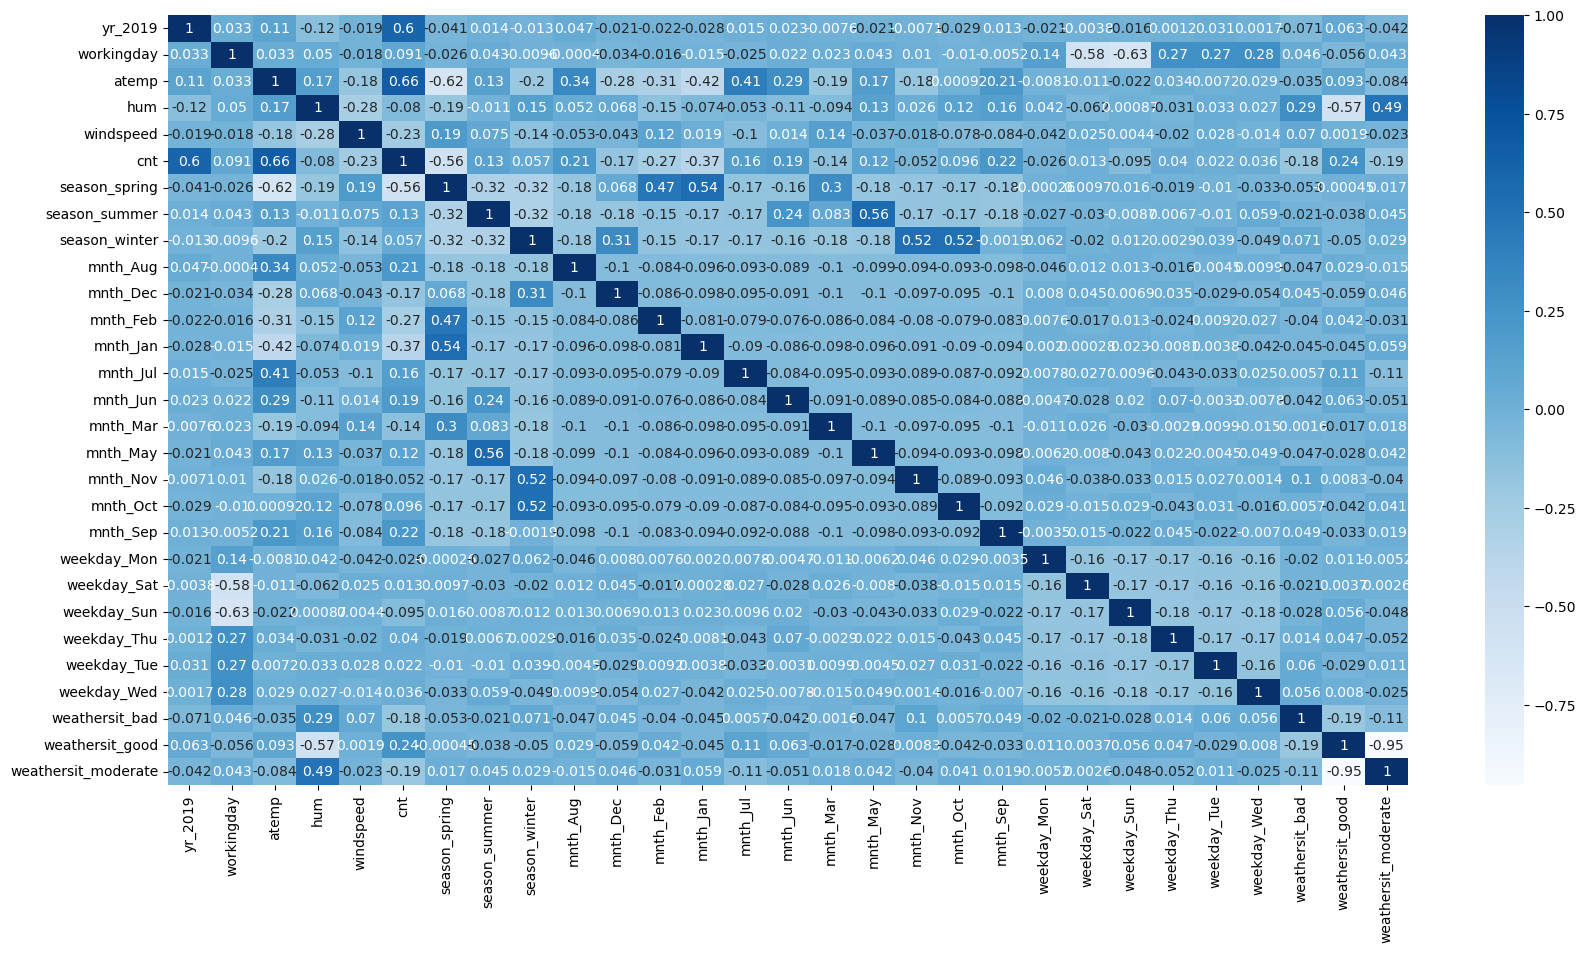

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot = True, cmap='Blues')

### Dividing into X and y sets for model building

In [65]:
y_train = df_train.pop('cnt')
X_train = df_train

In [66]:
y_train.head()

626    0.864421
364    0.247978
426    0.438851
728    0.164795
482    0.457443
Name: cnt, dtype: float64

In [67]:
X_train.head()

,yr_2019,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_bad,weathersit_good,weathersit_moderate
626,1,1,0.635584,0.450242,0.371638,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
364,0,0,0.461603,0.552447,0.382342,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
426,1,0,0.460736,0.559440,0.255342,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0.210280,0.381387,0.663106,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0.411155,0.389456,0.188475,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Use RFE (Recursive Feature Elimination)

In [68]:
help(RFE)

Help on class RFE in module sklearn.feature_selection._rfe:

class RFE(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
 |  
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through
 |  any specific attribute or callable.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in

In [69]:
# Running RFE with output number of variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [70]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr_2019', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 14),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [71]:
column = X_train.columns[rfe.support_]

In [72]:
column

Index(['yr_2019', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [73]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_moderate'],
      dtype='object')

In [74]:
# Creating X_train_rfe dataframe using the 15 columns selected by RFE
X = X_train[column]

## Build Model using statsmodel 

### Model 1 : Start with all the columns selected by RFE

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 626 to 521
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr_2019          510 non-null    int64  
 1   workingday       510 non-null    int64  
 2   atemp            510 non-null    float64
 3   hum              510 non-null    float64
 4   windspeed        510 non-null    float64
 5   season_spring    510 non-null    uint8  
 6   season_winter    510 non-null    uint8  
 7   mnth_Dec         510 non-null    uint8  
 8   mnth_Jan         510 non-null    uint8  
 9   mnth_Jul         510 non-null    uint8  
 10  mnth_Nov         510 non-null    uint8  
 11  mnth_Sep         510 non-null    uint8  
 12  weekday_Sat      510 non-null    uint8  
 13  weathersit_bad   510 non-null    uint8  
 14  weathersit_good  510 non-null    uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 28.9 KB


In [76]:
X_train_rfe = sm.add_constant(X)
lm= sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          9.41e-191
Time:                        21:03:11   Log-Likelihood:                 493.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     494   BIC:                            -887.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1916      0.034     

### Observation
Here we see mnth_Jan is insignificant as it has a higher p-value but just to be sure lets also look at the VIF

In [77]:
# Lets write a function to calculate VIF as we would be calling it multiple times
def get_vif(df):
    vif = pd.DataFrame()
    df1 = df
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [78]:
get_vif(X_train_rfe)

           Features    VIF
0             const  65.68
3             atemp   3.33
6     season_spring   2.74
7     season_winter   2.23
4               hum   2.07
11         mnth_Nov   1.67
15  weathersit_good   1.66
9          mnth_Jan   1.56
2        workingday   1.52
13      weekday_Sat   1.52
8          mnth_Dec   1.46
10         mnth_Jul   1.33
5         windspeed   1.22
14   weathersit_bad   1.15
12         mnth_Sep   1.13
1           yr_2019   1.05


##### Although mnth_Jan has a low VIF but as its insignificant lets remove it.

In [79]:
X_new = X.drop(["mnth_Jan"], axis = 1)

In [80]:
X_train_rfe = sm.add_constant(X_new)
lm= sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.03e-190
Time:                        21:05:04   Log-Likelihood:                 490.93
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     495   BIC:                            -888.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1784      0.033     

## Observation
We see Adj. R-squared is 0.84 which is pretty good. And all variables have negligible p-value which means they all are significant. And also VIF for all is less than 5. Hence we can assume we got our Model.

## Residual Analysis

<Axes: ylabel='Density'>

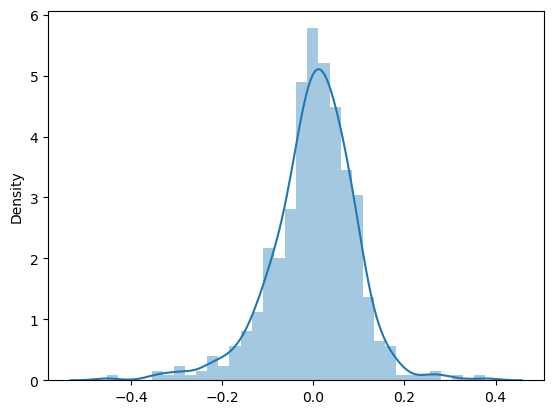

In [81]:
y_train_pred = lm.predict(X_train_rfe)
res = y_train - y_train_pred
sns.distplot(res)

## Observation
The residual analysis of the error terms shows a normal distribution graph with a mean of 0 which is good.

## Predictions and Evaluation on the Test Set

In [82]:
df_test.head()

,yr_2019,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_bad,weathersit_good,weathersit_moderate
185,0,1,34.81690,59.0417,8.459286,4665,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
639,1,1,27.11665,87.1667,6.999825,4639,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
300,0,1,15.94060,58.5833,15.375093,3747,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
222,0,1,32.57605,42.3750,11.041332,4792,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
153,0,1,29.35665,35.4167,16.959107,5312,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
nv

['atemp', 'hum', 'windspeed', 'cnt']

In [84]:
df_test[nv]= scaler.transform(df_test[nv])

In [86]:
df_test.describe()

,yr_2019,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.703196,0.553801,0.562174,0.319257,0.484718,0.251142,0.273973,0.237443,0.073059,...,0.068493,0.159817,0.155251,0.109589,0.123288,0.159817,0.141553,0.041096,0.648402,0.310502
std,0.500513,0.457896,0.232749,0.179169,0.157824,0.227716,0.434663,0.447017,0.426491,0.260830,...,0.253169,0.367276,0.362974,0.313092,0.329520,0.367276,0.349389,0.198967,0.478563,0.463759
min,0.000000,0.000000,0.027237,0.131791,-0.042808,-0.049378,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.345502,0.427649,0.213225,0.330677,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.576424,0.548144,0.303481,0.497042,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.729541,0.689408,0.400400,0.635156,0.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.049574,1.012910,0.807474,0.941205,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Because we only transform on test set and not fit hence we can see that few values are higher than 1 also. Which is okay.

In [87]:
y_test = df_test.pop('cnt')
X_test = df_test

In [88]:
# add contant to make prediction
X_test_sm = sm.add_constant(X_test)

In [94]:
X_test_sm.columns

Index(['const', 'yr_2019', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [95]:
X_train_rfe.columns

Index(['const', 'yr_2019', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [96]:
# drop the columns which are not in the final model
drop_col_list= ['season_summer','mnth_Aug','mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May','mnth_Oct','weekday_Mon','weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_moderate']
X_test_sm = X_test_sm.drop(drop_col_list, axis =1)

In [97]:
X_test_sm.columns

Index(['const', 'yr_2019', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [98]:
# predict
y_test_pred = lm.predict(X_test_sm)

In [101]:
# evalute
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8211333233293872

## Observation
This is a good r2 value. Our r2_score is very close to our model as well which was 0.846. So we can say what model learnt it can very well generalize it on the test set as well.

In [102]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.03e-190
Time:                        22:35:34   Log-Likelihood:                 490.93
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     495   BIC:                            -888.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1784      0.033      5.376      0.000       0.113       0.244
yr_2019             0.2373      0.009     27.909      0.000       0.221       0.254
workingday          0.0583      0.011      5.327      0.000       0.037       0.080
atemp               0.5022      0.033     15.084      0.000       0.437       0.568
hum                -0.1502      0.033     -4.583      0.000      -0.215      -0.086
windspeed          -0.1486      0.027     -5.553      0.000      -0.201      -0.096
season_spring      -0.1207      0.015     -7.818      0.000      -0.151      -0.090
season_winter       0.0780      0.014      5.424      0.000       0.050       0.106
mnth_Dec           -0.0411      0.017     -2.461      0.014      -0.074      -0.008
mnth_Jul           -0.0752      0.018     -4.282      0.000      -0.110      -0.041
mnth_Nov           -0.0607      0.019     -3.125      0.002      -0.099      -0.023
mnth_Sep            0.0594      0.016      3.821      0.000       0.029       0.090
weekday_Sat         0.0587      0.015      3.964      0.000       0.030       0.088
weathersit_bad     -0.1445      0.031     -4.706      0.000      -0.205      -0.084
weathersit_good     0.0527      0.011      4.752      0.000       0.031       0.075
==============================================================================
Omnibus:                       66.602   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.847
Skew:                          -0.622   Prob(JB):                     1.33e-42
Kurtosis:                       5.744   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We see the equation of our best fit line is:
cnt = 0.2373 * yr_2019 + 0.0583 * workingday + 0.5022 * atemp - 0.1502 * hum - 0.1486 * windspeed - 0.1207 * season_spring + 0.0780 * season_winter - 0.0411 * mnth_Dec - 0.0752 * mnth_Jul - 0.0607 * mnth_Nov + 0.0594 * mnth_Sep + 0.0587 * weekday_Sat - 0.1445 * weathersit_bad + 0.0527 * weathersit_good

## Interpretation of the model
<b>The most significant variables to predict the demand of the bike are yr_2019, atemp, hum, windspeed, season_spring, mnth_Sep, weathersit_bad :- <b>
- We can see that in the year 2019 the demand for boombikes had increased. It could mean that with time it could become more popular.
- We observed that demand for bikes increase when the temperature is hot. It could mean that people don't like to go for a bike ride when its cold.
- We also see that when its humid or windy the demand decresed. Hence we can assume people like to go for a bike ride on pleasant clear day the most.
- We see a decline in the demand in spring season even though the weather is generally good, hence company should try to attract customers by giving offers during this season.
- We see the highest demand for bike in sept hence we should try to maximize our profits in this month and bikes should be available in sufficent numbers and good condition at the docks during this season.
- We see very less demand in bad weather conditions, which is understandable too, hence we can try to utilize this time to repair the bikes which are not in good condition.

<b>Variables which our final model uses to predict the demand for bikes are:-<b>
- yr
- workingday
- atemp
- humidity
- windspeed
- season (spring + winter)
- mnth (July + Sept + Nov + Dec)
- weekday (saturday)
- weathersit (bad + good)
